# Wine Quality Project

This section of Python code first imports data analytics Python Libraries. Next, it creates dataframes for the red wine and white wine quality data files, which are then combined through concatenation into a combined wines dataframe.

In [1]:
import glob
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as scy
import math

file_path = '/Users/robdj/Desktop/Data Analytics Cert/Course 4 Capstone/Project Files/Clean_Data/Option 3 - Wines/winequality-white_cleaned.csv'
df_whitewine = pd.read_csv(file_path)
df_whitewine['winetype'] = 'white_wine'



file_path = '/Users/robdj/Desktop/Data Analytics Cert/Course 4 Capstone/Project Files/Clean_Data/Option 3 - Wines/winequality-red.csv'
df_redwine = pd.read_csv(file_path)
df_redwine['winetype'] = 'red_wine'

df_frames = [df_redwine, df_whitewine]
df_wines = pd.concat(df_frames)

df_wines.insert(0,'wine_id',range(0, 0 + len(df_wines)))

df_wines.to_csv('wines.csv')


In [2]:
#df_wines.to_csv('wines.csv')
print('All Wines')
print(df_wines['quality'].describe(include="all"))
print('Red Wines')
print(df_redwine['quality'].describe(include="all"))
print('White Wines')
print(df_whitewine['quality'].describe(include="all"))


All Wines
count    6497.000000
mean        5.818378
std         0.873255
min         3.000000
25%         5.000000
50%         6.000000
75%         6.000000
max         9.000000
Name: quality, dtype: float64
Red Wines
count    1599.000000
mean        5.636023
std         0.807569
min         3.000000
25%         5.000000
50%         6.000000
75%         6.000000
max         8.000000
Name: quality, dtype: float64
White Wines
count    4898.000000
mean        5.877909
std         0.885639
min         3.000000
25%         5.000000
50%         6.000000
75%         6.000000
max         9.000000
Name: quality, dtype: float64


The describe function outputs descriptive statistics for quality variables for white wines, red wines, and the combined wines data frames.

Overall, wines (white and red combined) have a mean quality score of 5.818. White wines are rated higher then red at 5.877 vs. 5.636.

White wines have a standard devication of 0.885 and red wines have a standard deviation of 0.807, which means that white wine quality score are more have more deviation from the central value than red wines.

In [3]:
#print(df_wines)

#df_wines.to_csv('wines.csv')
print('All Wines')
print(df_wines['quality'].describe(include="all"))
print('Red Wines')
print(df_redwine['quality'].describe(include="all"))
print('White Wines')
print(df_whitewine['quality'].describe(include="all"))

All Wines
count    6497.000000
mean        5.818378
std         0.873255
min         3.000000
25%         5.000000
50%         6.000000
75%         6.000000
max         9.000000
Name: quality, dtype: float64
Red Wines
count    1599.000000
mean        5.636023
std         0.807569
min         3.000000
25%         5.000000
50%         6.000000
75%         6.000000
max         8.000000
Name: quality, dtype: float64
White Wines
count    4898.000000
mean        5.877909
std         0.885639
min         3.000000
25%         5.000000
50%         6.000000
75%         6.000000
max         9.000000
Name: quality, dtype: float64


The next few blocks of codes create correlation heat maps for all the variables within the red, white, and combined wine data frames.

A few variables, alcohol, pH, sulfates, and free sulfur dioxides have a high color intensity in the heatmap visual, which indicates a correlation with quality.

<Axes: >

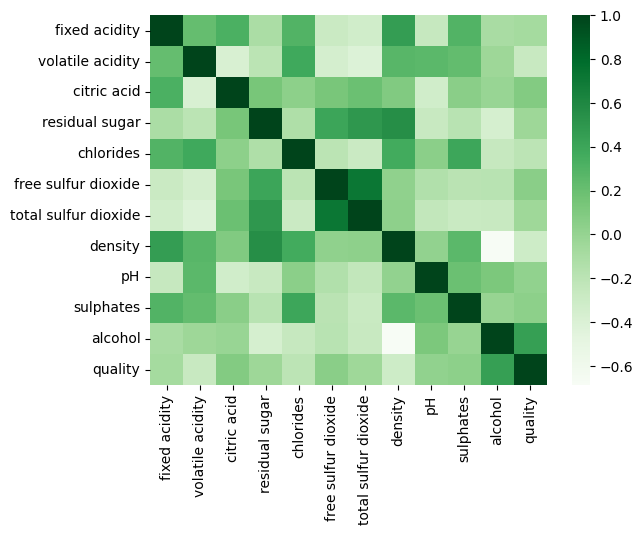

In [4]:
cols = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide',
           'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']
df_corr = df_wines[cols]
corr = df_corr.corr()
sns.heatmap(corr,
            cmap='Greens',
            xticklabels=corr.columns,
            yticklabels=corr.columns)

<Axes: >

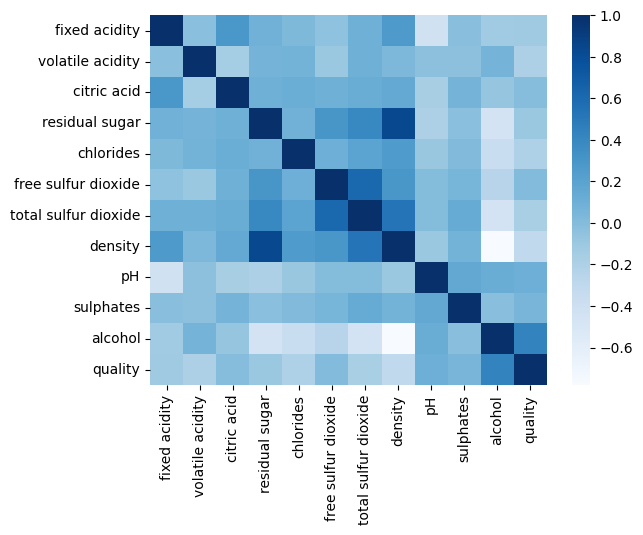

In [5]:
cols2 = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide',
           'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']
df_corr2 = df_whitewine[cols2]
corr = df_corr2.corr()
sns.heatmap(corr,
            cmap='Blues',
            xticklabels=corr.columns,
            yticklabels=corr.columns)

The next three blocks of code generate frequency bar charts for quality wines overall, red wines, and white wines. The scape of the distribution indicates a nearly normal distribution of wine quality with a center peak between 6 and 7.

<Axes: >

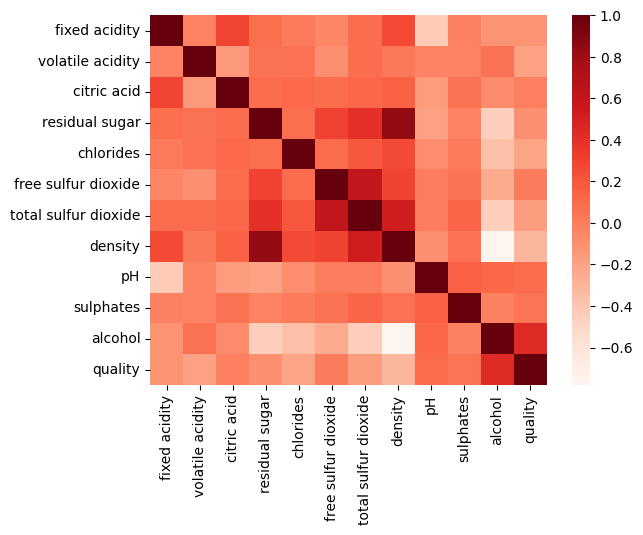

In [6]:
cols3 = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide',
           'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']
df_corr3 = df_redwine[cols3]
corr = df_corr2.corr()
sns.heatmap(corr,
            cmap='Reds',
            xticklabels=corr.columns,
            yticklabels=corr.columns)

In [7]:
cols = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide',
           'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']
df_corr = df_wines[cols]
corr = df_corr.corr()
print(corr)

                      fixed acidity  volatile acidity  citric acid  \
fixed acidity              1.000000          0.219008     0.324436   
volatile acidity           0.219008          1.000000    -0.377981   
citric acid                0.324436         -0.377981     1.000000   
residual sugar            -0.111981         -0.196011     0.142451   
chlorides                  0.298195          0.377124     0.038998   
free sulfur dioxide       -0.282735         -0.352557     0.133126   
total sulfur dioxide      -0.329054         -0.414476     0.195242   
density                    0.458910          0.271296     0.096154   
pH                        -0.252700          0.261454    -0.329808   
sulphates                  0.299568          0.225984     0.056197   
alcohol                   -0.095452         -0.037640    -0.010493   
quality                   -0.076743         -0.265699     0.085532   

                      residual sugar  chlorides  free sulfur dioxide  \
fixed acidity    

<Axes: xlabel='pH', ylabel='quality'>

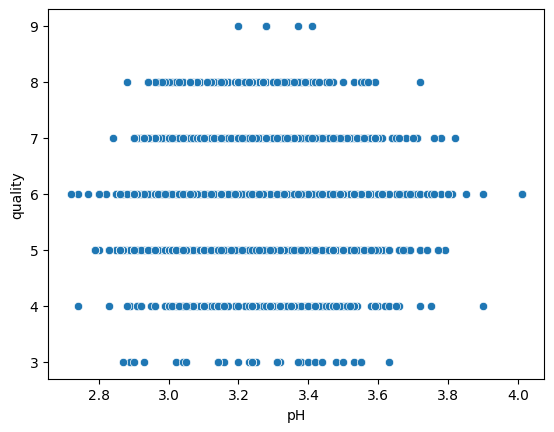

In [8]:
sns.scatterplot(data=df_wines, x="pH", y="quality")

<Axes: xlabel='alcohol', ylabel='quality'>

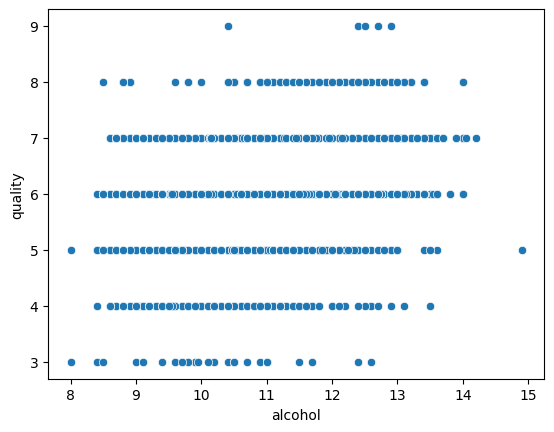

In [9]:
sns.scatterplot(data=df_wines, x="alcohol", y="quality")

<Axes: >

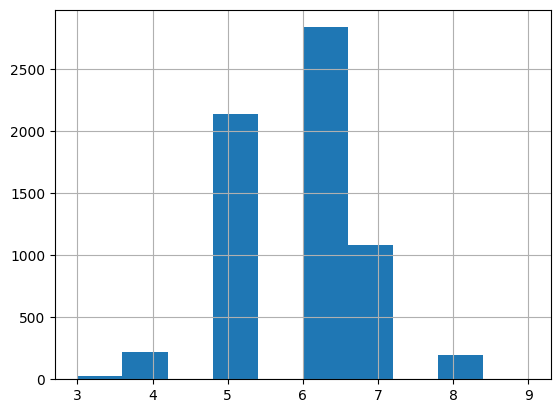

In [10]:
df_wines['quality'].hist()

<Axes: >

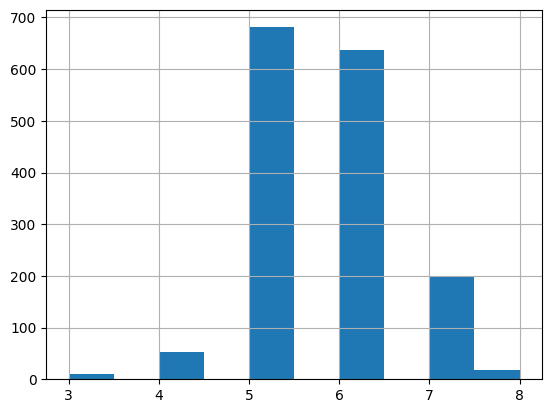

In [11]:
df_redwine['quality'].hist()

<Axes: >

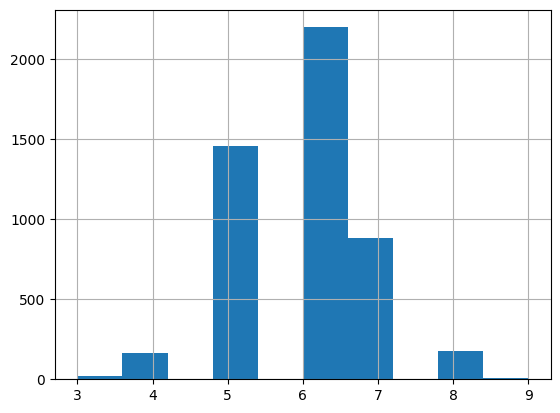

In [12]:
df_whitewine['quality'].hist()

# Z test of White and Red Wine pH

White wines are more acidic than red wines.

Null Hypothesis
Alternative Hypothesis


In [13]:
print('All Wines')
print(df_wines['pH'].describe(include="all"))
print('Red Wines')
print(df_redwine['pH'].describe(include="all"))
print('White Wines')
print(df_whitewine['pH'].describe(include="all"))


All Wines
count    6497.000000
mean        3.218501
std         0.160787
min         2.720000
25%         3.110000
50%         3.210000
75%         3.320000
max         4.010000
Name: pH, dtype: float64
Red Wines
count    1599.000000
mean        3.311113
std         0.154386
min         2.740000
25%         3.210000
50%         3.310000
75%         3.400000
max         4.010000
Name: pH, dtype: float64
White Wines
count    4898.000000
mean        3.188267
std         0.151001
min         2.720000
25%         3.090000
50%         3.180000
75%         3.280000
max         3.820000
Name: pH, dtype: float64


pH adn Quality

In [14]:
#z Statistic

ztest_white = (df_whitewine['pH'].mean() - df_wines['pH'].mean()) / (df_wines['pH'].std() / math.sqrt(6497))

print(ztest_white)


-15.156661064807707


In [15]:
#p value

p_value = scy.norm.sf(abs(ztest_white))

print(p_value)


3.423119326446048e-52
